Original Dataset Shape: (1000, 30)
Class
0    950
1     50
Name: count, dtype: int64


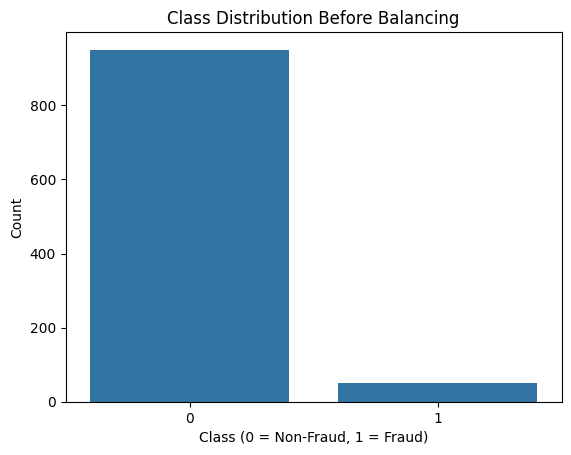

Balanced Dataset Shape: (100, 30)
Class
1    50
0    50
Name: count, dtype: int64


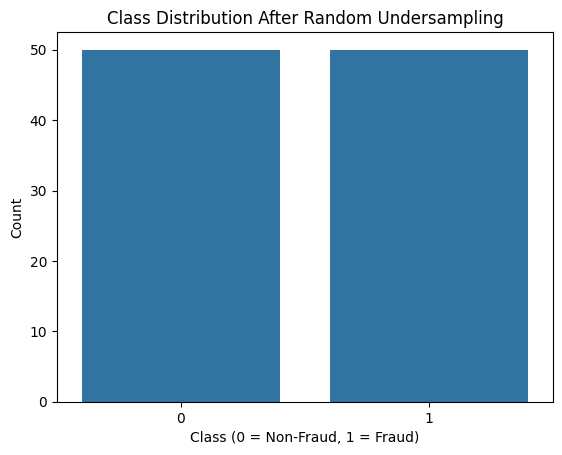

In [5]:
# Step 1: Import required libraries
import os
import zipfile
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample

# Step 2: Download dataset from Kaggle (requires kaggle.json)
# Uncomment the next lines if running in an environment like Colab or local Jupyter
# and you have kaggle.json file from your Kaggle account.

# os.environ['KAGGLE_USERNAME'] = "your_kaggle_username"
# os.environ['KAGGLE_KEY'] = "your_kaggle_key"

# If using kaggle.json file directly:
os.environ['KAGGLE_CONFIG_DIR'] = os.getcwd()

# Download and unzip
if not os.path.exists('creditcard.csv'):
    !kaggle datasets download -d mlg-ulb/creditcardfraud
    with zipfile.ZipFile("creditcardfraud.zip", "r") as zip_ref:
        zip_ref.extractall()

# Step 3: Load the dataset
df = pd.read_csv('creditcard.csv')
print("Original Dataset Shape:", df.shape)
print(df['Class'].value_counts())

# Step 4: Visualize class imbalance
sns.countplot(x='Class', data=df)
plt.title('Class Distribution Before Balancing')
plt.xlabel('Class (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Count')
plt.show()

# Step 5: Handle class imbalance using random undersampling
df_majority = df[df['Class'] == 0]
df_minority = df[df['Class'] == 1]

df_majority_downsampled = resample(df_majority,
                                   replace=False,
                                   n_samples=len(df_minority),
                                   random_state=42)

df_balanced = pd.concat([df_majority_downsampled, df_minority])
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

print("Balanced Dataset Shape:", df_balanced.shape)
print(df_balanced['Class'].value_counts())

# Step 6: Visualize balanced class distribution
sns.countplot(x='Class', data=df_balanced)
plt.title('Class Distribution After Random Undersampling')
plt.xlabel('Class (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Count')
plt.show()


In [6]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
n_nonfraud = 950
n_fraud = 50
n_total = n_nonfraud + n_fraud

# Generate mock features
def generate_features(n):
    return pd.DataFrame({
        f'V{i}': np.random.randn(n) for i in range(1, 29)
    }).assign(Amount=np.random.uniform(1, 500, size=n))

# Generate data
df_nonfraud = generate_features(n_nonfraud)
df_fraud = generate_features(n_fraud)

# Add 'Class' labels
df_nonfraud['Class'] = 0
df_fraud['Class'] = 1

# Combine datasets
df = pd.concat([df_nonfraud, df_fraud], ignore_index=True)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Save to CSV
df.to_csv('creditcard.csv', index=False)

print("Mock creditcard.csv created successfully.")


Mock creditcard.csv created successfully.
